# Exploratory Factor Analysis
The purpose of this notebook is to 

In [1]:
library(psych)

setwd('/Users/catcamacho/Box/SNAP/BABIES/BABIES_asl/quest_analysis/')
ibq_data<-read.csv('ibq_fullsample.csv')
colnames(ibq_data)

[1] "ID"                      "activity_level"         
 [3] "distress_to_limitations" "fear"                   
 [5] "duration_of_orienting"   "smiling_laughter"       
 [7] "high_intensity_pleasure" "low_intensity_pleasure" 
 [9] "soothability"            "falling_reactivity"     
[11] "cuddliness"              "perceptual_sensitivity" 
[13] "sadness"                 "approach"               
[15] "vocal_reactivity"        "SUR"                    
[17] "NEG"                     "REG"                    
[19] "age"                     "aff_reactivity"         
[21] "pos_recovery"

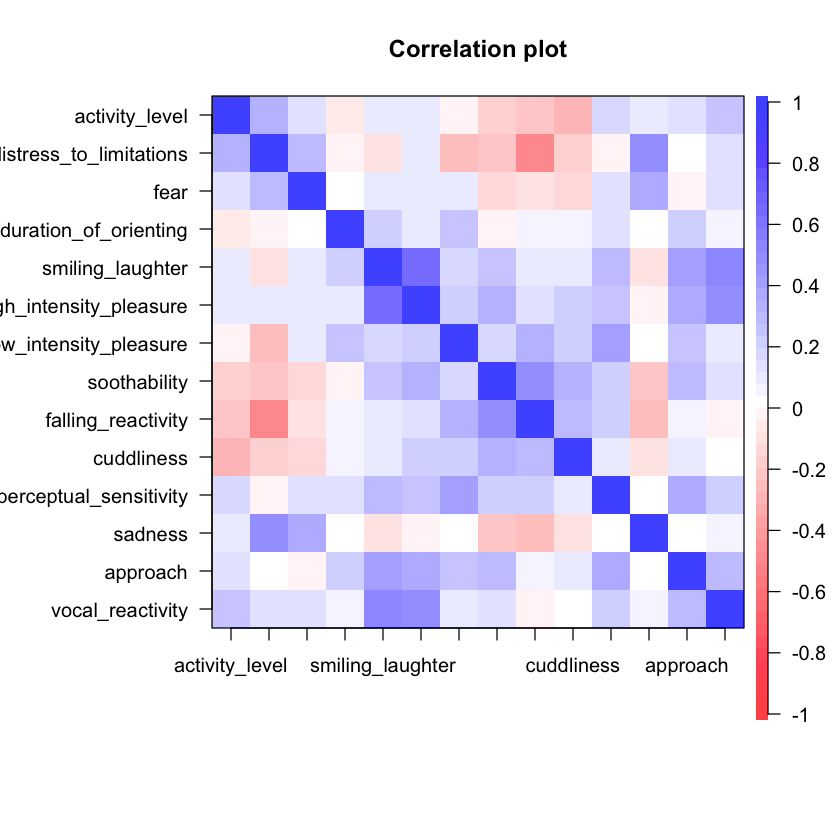

In [17]:
features<-ibq_data[,2:15]
features<-scale(features, scale=TRUE)

cor.plot(features)

cor_mtx <-cor(features, use = "pairwise.complete.obs")

Parallel analysis suggests that the number of factors =  3  and the number of components =  2 


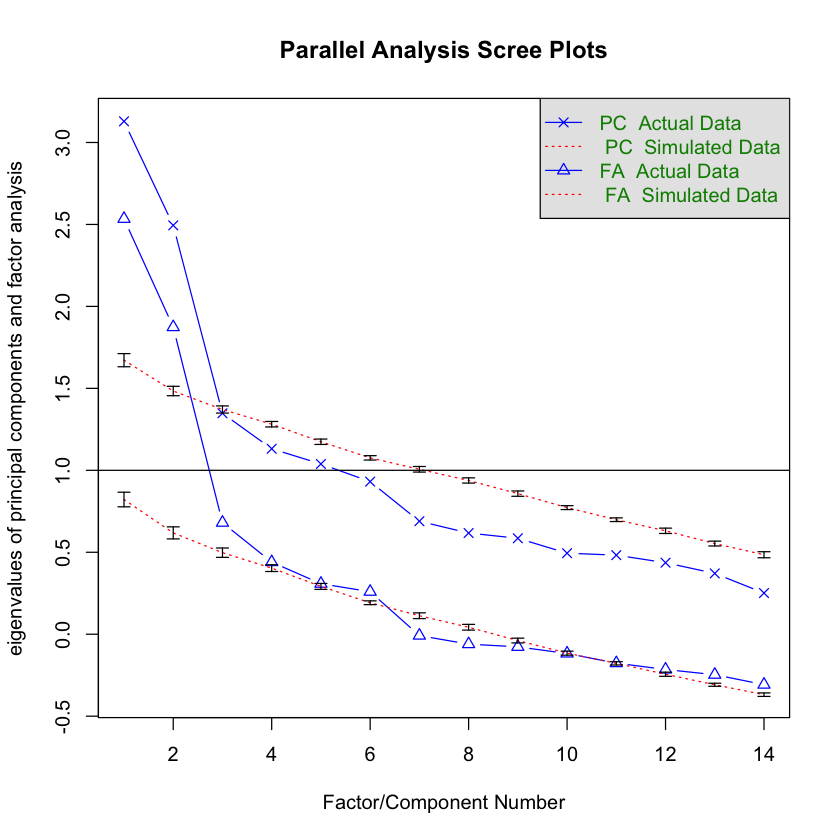

In [18]:
fa.parallel(cor_mtx, fa='both', n.obs=107, fm='ml', SMC=TRUE, error.bars=TRUE, se.bars=TRUE)

In [19]:
model3 <- fa(features,3,fm='ml',rotate='oblimin')
model3

Loading required namespace: GPArotation


Factor Analysis using method =  ml
Call: fa(r = features, nfactors = 3, rotate = "oblimin", fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
                          ML1   ML2   ML3    h2   u2 com
activity_level           0.16  0.41  0.00 0.186 0.81 1.3
distress_to_limitations  0.07  0.72 -0.08 0.548 0.45 1.0
fear                     0.05  0.44  0.22 0.211 0.79 1.5
duration_of_orienting    0.10  0.02  0.23 0.074 0.93 1.4
smiling_laughter         0.82 -0.08 -0.02 0.670 0.33 1.0
high_intensity_pleasure  0.75  0.00  0.06 0.586 0.41 1.0
low_intensity_pleasure   0.00 -0.09  0.71 0.539 0.46 1.0
soothability             0.27 -0.45  0.11 0.332 0.67 1.8
falling_reactivity      -0.02 -0.58  0.29 0.493 0.51 1.5
cuddliness               0.08 -0.35  0.12 0.165 0.84 1.3
perceptual_sensitivity   0.20  0.08  0.51 0.345 0.65 1.4
sadness                 -0.11  0.62  0.25 0.381 0.62 1.4
approach                 0.41  0.04  0.26 0.289 0.71 1.7
vocal_reactivity         0.66 

In [21]:
library(lavaan)

cfa3.model <- 'neg =~ distress_to_limitations + falling_reactivity + sadness + soothability + fear + activity_level + cuddliness
               surg =~ smiling_laughter + high_intensity_pleasure + vocal_reactivity + approach
               sens =~ low_intensity_pleasure + perceptual_sensitivity'
cfa3_fit <- cfa(cfa3.model, data=features)
summary(cfa3_fit, fit.measures=TRUE)
parameterEstimates(cfa3_fit)
inspect(cfa3_fit, what='std')

lavaan 0.6-3 ended normally after 32 iterations

  Optimization method                           NLMINB
  Number of free parameters                         29

                                                  Used       Total
  Number of observations                           107         113

  Estimator                                         ML
  Model Fit Test Statistic                     110.050
  Degrees of freedom                                62
  P-value (Chi-square)                           0.000

Model test baseline model:

  Minimum Function Test Statistic              364.895
  Degrees of freedom                                78
  P-value                                        0.000

User model versus baseline model:

  Comparative Fit Index (CFI)                    0.833
  Tucker-Lewis Index (TLI)                       0.789

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -1839.790
  Loglikelihood unrestricted model (H1)      -17

lhs,op,rhs,est,se,z,pvalue,ci.lower,ci.upper
neg,=~,distress_to_limitations,1.00000000,0.00000000,NA,NA,1.00000000,1.00000000
neg,=~,falling_reactivity,-1.05210603,0.19639056,-5.357213,8.451551e-08,-1.43702446,-0.66718761
neg,=~,sadness,0.70443862,0.17433731,4.040665,5.329993e-05,0.36274376,1.04613347
neg,=~,soothability,-0.81369433,0.17867453,-4.554059,5.262061e-06,-1.16388998,-0.46349869
neg,=~,fear,0.46299333,0.16764366,2.761771,5.748885e-03,0.13441780,0.79156885
neg,=~,activity_level,0.55327142,0.16976522,3.259039,1.117904e-03,0.22053771,0.88600513
neg,=~,cuddliness,-0.60659858,0.17122146,-3.542772,3.959449e-04,-0.94218647,-0.27101069
surg,=~,smiling_laughter,1.00000000,0.00000000,NA,NA,1.00000000,1.00000000
surg,=~,high_intensity_pleasure,0.93781625,0.13756747,6.817137,9.287238e-12,0.66818896,1.20744355
surg,=~,vocal_reactivity,0.76479847,0.12950834,5.905399,3.517932e-09,0.51096679,1.01863014


,neg,surg,sens
distress_to_limitations,0.6798753,0.0000000,0.0000000
falling_reactivity,-0.7153009,0.0000000,0.0000000
sadness,0.4789305,0.0000000,0.0000000
soothability,-0.5532108,0.0000000,0.0000000
fear,0.3147778,0.0000000,0.0000000
activity_level,0.3761557,0.0000000,0.0000000
cuddliness,-0.4124115,0.0000000,0.0000000
smiling_laughter,0.0000000,0.8179719,0.0000000
high_intensity_pleasure,0.0000000,0.7671073,0.0000000
vocal_reactivity,0.0000000,0.6255837,0.0000000
